In [1]:
import SSVAERegressor
import numpy as np
import util
from sklearn.preprocessing import  *

# Data

In [2]:
class BatchFeeder:
    """ Simple iterator for feeding a subset of numpy matrix into tf network.
    validation data has same size of mini batch
     Parameter
    ----------------
    X: ndarray
    y: ndarray
    batch_size: mini batch size
    """

    def __init__(self, x_, y_, batch_size):
        """check whether X and Y have the matching sample size."""
        assert x_.shape[0] == y_.shape[0]
        self.n = x_.shape[0]
        self.X = x_
        self.y = y_
        self.index = 0
        self.batch_size = batch_size
        self.batch_num = int(np.ceil(self.n*1.0/self.batch_size))
    
    def next(self):
        if self.index + self.batch_size > self.n:
            self.index = 0
            self.randomize()
        ret_x = self.X[self.index:self.index+self.batch_size]
        ret_y = self.y[self.index:self.index+self.batch_size]
        self.index += self.batch_size
        return ret_x, ret_y
    
    def randomize(self):
        indexes = np.arange(self.n)
        np.random.shuffle(indexes)
        self.y = self.y[indexes]
        self.X = self.X[indexes]

In [3]:
# Gene Expression Data
raw = np.genfromtxt("Drug_data/entire_data_only_AML_and_UW_joined.tsv", delimiter="\t")
xp = raw[1:, 1:]

In [4]:
# Drug Sensitivity data
raw = np.genfromtxt("Drug_data/UW_AML.patient_batch123.AUC.renamed.txt", delimiter="\t")
drug = raw[1:, 2:-1]
drug = np.transpose(drug)

In [5]:
unlabeled = BatchFeeder(xp[:-30, :], np.zeros(xp[:-30].shape[0]), 256)

In [6]:
labeled = BatchFeeder(xp[-30:-10, :], scale(drug[:-10, :]), 20)

In [7]:
test = (xp[-10:, :], scale(drug[-10:, :]))

# Training

In [13]:
model = SSVAERegressor.SSVAERegressor(input_dim=4051, vae_dims=[1024, 256], reg_dims=[128], latent_dim=32, prediction_dim=159, verbose=True)

Tensor("encoder/fully_connected/Identity:0", shape=(?, 1024), dtype=float32)
Tensor("encoder/fully_connected_1/Identity:0", shape=(?, 256), dtype=float32)
Tensor("encoder/fully_connected_2/Identity:0", shape=(?, 32), dtype=float32) Tensor("encoder/fully_connected_3/Identity:0", shape=(?, 32), dtype=float32)
Tensor("encoder_1/fully_connected/Identity:0", shape=(?, 1024), dtype=float32)
Tensor("encoder_1/fully_connected_1/Identity:0", shape=(?, 256), dtype=float32)
Tensor("encoder_1/fully_connected_2/Identity:0", shape=(?, 32), dtype=float32) Tensor("encoder_1/fully_connected_3/Identity:0", shape=(?, 32), dtype=float32)
Tensor("regressor/fully_connected/Identity:0", shape=(?, 128), dtype=float32)
Tensor("regressor/fully_connected_1/Identity:0", shape=(?, 159), dtype=float32) Tensor("regressor/fully_connected_2/Identity:0", shape=(?, 159), dtype=float32)
Tensor("regressor_1/fully_connected/Identity:0", shape=(?, 128), dtype=float32)
Tensor("regressor_1/fully_connected_1/Identity:0", shape

In [14]:
model.train(labeled, unlabeled, epochs=10000, valid=test)

Epoch: [9626/10000] loss: nan, kld: nan, rec: 5533.90, logdensity(labeled): nan, entropy(unlabeled): nan, mse: nan: nanmse: 12.06

KeyboardInterrupt: 

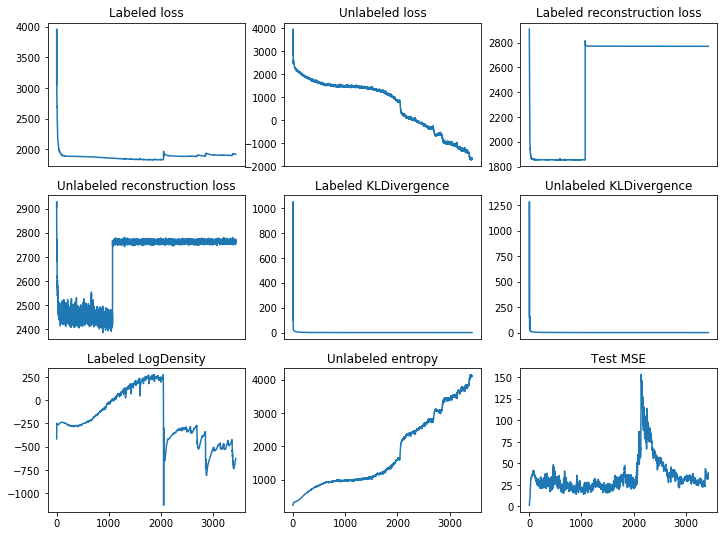

In [12]:
model.plotinfo()

In [112]:
prediction = model.predict(test[0])[0]

In [117]:
prediction-test[1]

array([[  7.12134748e-01,   9.67893775e-01,  -8.08933931e-01, ...,
          1.07202901e+00,   4.64612977e-01,  -3.97066549e-01],
       [  1.32652145e+00,   2.35384097e+00,   1.55054296e+00, ...,
          1.77050913e+00,   5.76681566e-01,   2.46001208e+00],
       [ -5.20657543e-01,   7.76618156e-01,  -4.33004637e-01, ...,
         -4.61316453e-01,   2.20629633e+00,   3.72079018e-02],
       ..., 
       [ -1.11373720e-01,   1.35566044e-01,  -1.75506870e+00, ...,
         -1.09861303e+00,   6.10488011e-02,   5.37617893e-01],
       [ -6.50240354e-01,  -7.25050918e-02,  -4.06271679e-01, ...,
         -6.22460523e-01,  -9.04857024e-01,   1.46780150e+00],
       [ -1.07664373e+00,  -9.31085768e-01,  -2.24366228e+00, ...,
         -5.77301331e-01,   6.99063457e-05,  -7.71288188e-01]])

In [116]:
test[1].shape

(10, 159)

In [97]:
for i in range(10):
    print prediction[i], test[1][i]

[ 3.43853188] -0.294098644853
[ 2.5775578] -0.851674791024
[ 2.36301064] 1.00600213154
[ 1.25710988] -0.999091542444
[ 0.78991622] -1.11363300795
[ 0.86585933] -0.539383157826
[-0.1532212] -0.802429145133
[ 3.47121954] 0.593371686763
[ 2.56514907] 1.22841417065
[ 1.71577239] 1.77252230027
